In [7]:
import os 
import matplotlib.pyplot as plt

In [10]:
class AnalyseDataset:
    def __call__(self, folder):
        self.folder = folder
        self.type = folder.split("/")[-1]

        self.read_data()
        self.data_estatistics()
        self.plot_axles_localization()
        self.frequence_bar_chart()

    def read_data(self):
        files_path = [os.path.join(f"{self.folder}/labels", x) for x in os.listdir(f"{self.folder}/labels")]

        self.data = []
        self.number_axles_per_file = []
        for file in files_path:
            with open(file, 'r') as f:
                lines = f.readlines()
                if len(lines) == 0:
                    print(file)
                self.number_axles_per_file.append(len(lines))
                for line in lines:
                    x, y, w, h = line.split(" ")[1:]
                    self.data.append((float(x), 1 - float(y)))

    def data_estatistics(self):
        mean = sum(self.number_axles_per_file) / len(self.number_axles_per_file)
        maximum = max(self.number_axles_per_file)
        minimum = min(self.number_axles_per_file)
        print(f"Average: {mean} - Maximum: {maximum} - Minimum: {minimum}")

        self.num_axles = {k: 0 for k in range(minimum, maximum+1)}
        for num in self.number_axles_per_file:
            self.num_axles[num] += 1

        print(self.num_axles)

    def plot_axles_localization(self):
        # Unpack the list of tuples into x and y coordinates
        x, y = zip(*self.data)

        # Create the plot
        plt.figure(figsize=(8, 6))
        plt.scatter(x, y, color='blue', label='Centro dos eixos')  # Scatter plot


        # Add labels, title, and legend
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        plt.ylim(0, 1)
        plt.title('Localização do centro dos eixos')
        plt.legend()
        plt.grid(True)

        plt.savefig(f"data_analysis/{self.type}_axle_localization.png")
        # Show the plot
        plt.show()


    def frequence_bar_chart(self):
        # Dados
        indexes = list(self.num_axles.keys())
        values = list(self.num_axles.values())

        # Criando o gráfico de barras
        plt.figure(figsize=(5, 3))
        plt.bar(indexes, values, width=0.6, edgecolor='black', alpha=0.7)
        plt.title("Frequência da quantidade de eixos")
        plt.xlabel("Quantidade de eixos")
        plt.ylabel("Frequência")
        plt.xticks(indexes)
        plt.grid(axis='y', linestyle='--', alpha=0.6)

        plt.savefig(f"data_analysis/{self.type}_bar_chat.png")
        # Exibindo o gráfico
        plt.show()




Average: 3.6804733727810652 - Maximum: 9 - Minimum: 2
{2: 468, 3: 480, 4: 99, 5: 156, 6: 204, 7: 102, 8: 0, 9: 12}


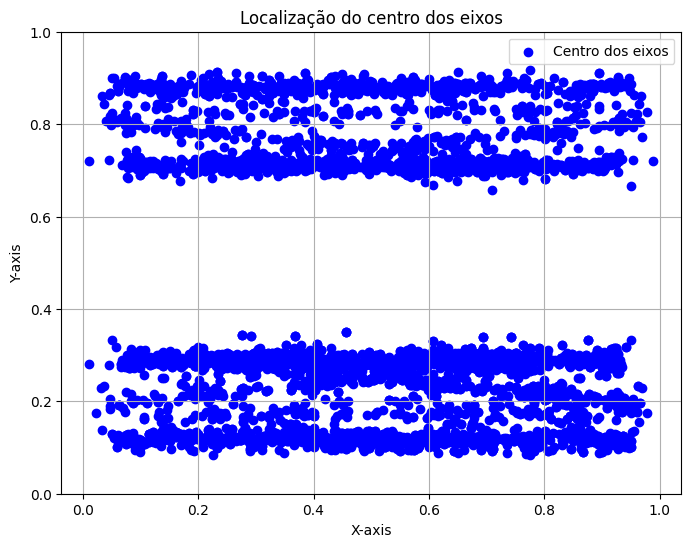

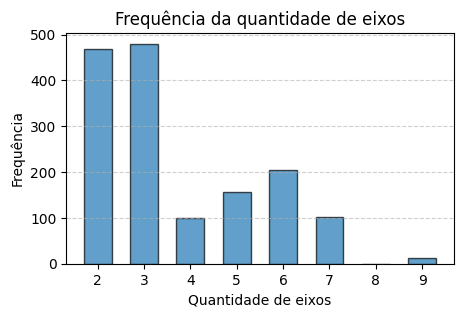

In [11]:
analyse = AnalyseDataset()
analyse("../Dataset/train")

Average: 3.63302752293578 - Maximum: 9 - Minimum: 2
{2: 43, 3: 23, 4: 8, 5: 12, 6: 16, 7: 5, 8: 0, 9: 2}


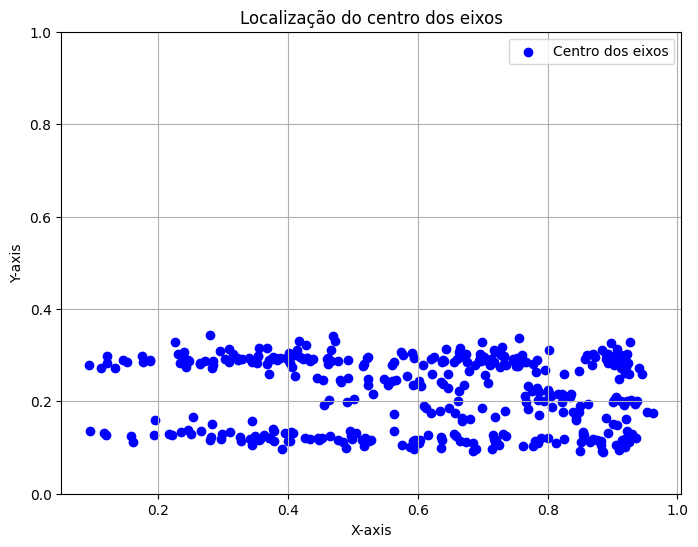

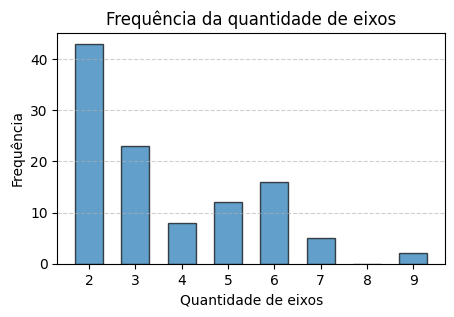

In [12]:
analyse("../Dataset/valid")

Average: 3.6513761467889907 - Maximum: 7 - Minimum: 2
{2: 25, 3: 47, 4: 5, 5: 12, 6: 13, 7: 7}


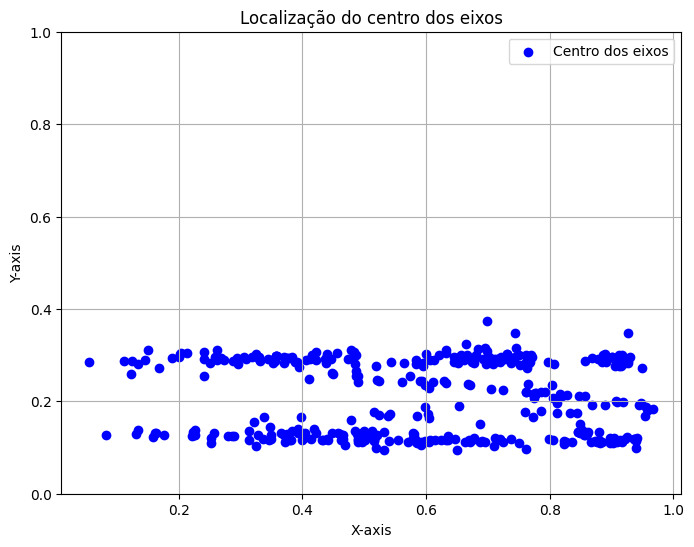

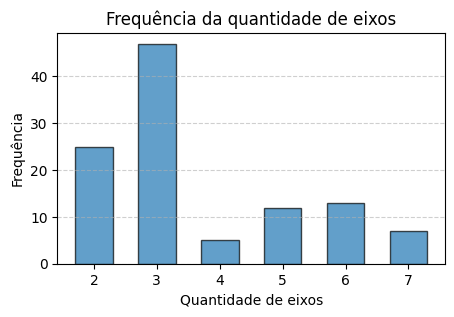

In [13]:
analyse("../Dataset/test")